# **LAB 8**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [7]:
import zipfile
import pandas as pd

# Define the path to the ZIP file
zip_file_path = r"C:\Users\91935\Downloads\productivity+prediction+of+garment+employees.zip"

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("extracted_files")  # Extract contents to a folder

# Read the CSV file
csv_file_path = "extracted_files/garments_worker_productivity.csv"  
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
print(df.head())



       date   quarter  department       day  team  targeted_productivity  \
0  1/1/2015  Quarter1      sweing  Thursday     8                   0.80   
1  1/1/2015  Quarter1  finishing   Thursday     1                   0.75   
2  1/1/2015  Quarter1      sweing  Thursday    11                   0.80   
3  1/1/2015  Quarter1      sweing  Thursday    12                   0.80   
4  1/1/2015  Quarter1      sweing  Thursday     6                   0.80   

     smv     wip  over_time  incentive  idle_time  idle_men  \
0  26.16  1108.0       7080         98        0.0         0   
1   3.94     NaN        960          0        0.0         0   
2  11.41   968.0       3660         50        0.0         0   
3  11.41   968.0       3660         50        0.0         0   
4  25.90  1170.0       1920         50        0.0         0   

   no_of_style_change  no_of_workers  actual_productivity  
0                   0           59.0             0.940725  
1                   0            8.0        

In [10]:
regression_df = df[['quarter' , 'department' , 'team' , 'targeted_productivity' , 'smv' , 'wip' , 'over_time' , 'incentive' , 'actual_productivity']]

In [11]:
regression_df.head(9)

,quarter,department,team,targeted_productivity,smv,wip,over_time,incentive,actual_productivity
0,Quarter1,sweing,8,0.80,26.16,1108.0,7080,98,0.940725
1,Quarter1,finishing,1,0.75,3.94,NaN,960,0,0.886500
2,Quarter1,sweing,11,0.80,11.41,968.0,3660,50,0.800570
3,Quarter1,sweing,12,0.80,11.41,968.0,3660,50,0.800570
4,Quarter1,sweing,6,0.80,25.90,1170.0,1920,50,0.800382
5,Quarter1,sweing,7,0.80,25.90,984.0,6720,38,0.800125
6,Quarter1,finishing,2,0.75,3.94,NaN,960,0,0.755167
7,Quarter1,sweing,3,0.75,28.08,795.0,6900,45,0.753683
8,Quarter1,sweing,2,0.75,19.87,733.0,6000,34,0.753098


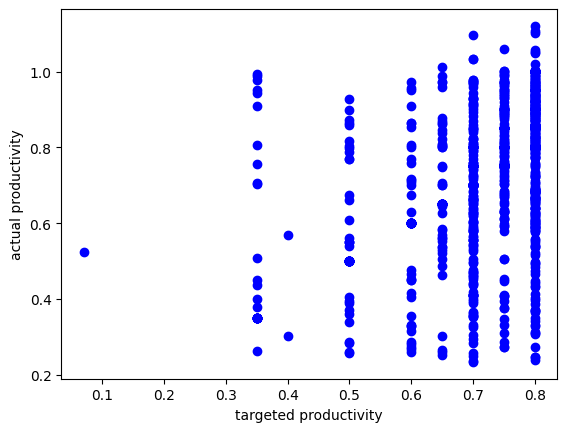

In [13]:
plt.scatter(regression_df.targeted_productivity, regression_df.actual_productivity,  color='blue')
plt.xlabel("targeted productivity")
plt.ylabel("actual productivity")
plt.show()

In [27]:
msk = np.random.rand(len(df)) < 0.7
train = regression_df[msk]
test = regression_df[~msk]

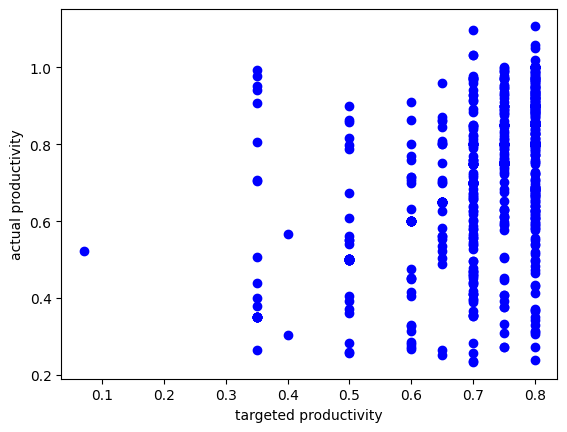

In [28]:
plt.scatter(train.targeted_productivity, train.actual_productivity,  color='blue')
plt.xlabel("targeted productivity")
plt.ylabel("actual productivity")
plt.show()

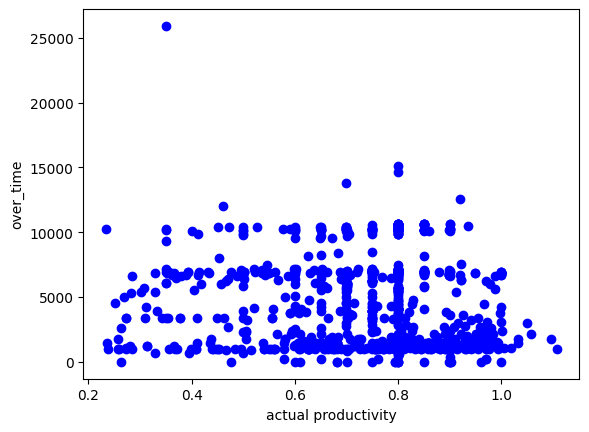

In [34]:
plt.scatter(train.actual_productivity, train.over_time,  color='blue')
plt.xlabel("actual productivity")
plt.ylabel("over_time")
plt.show()

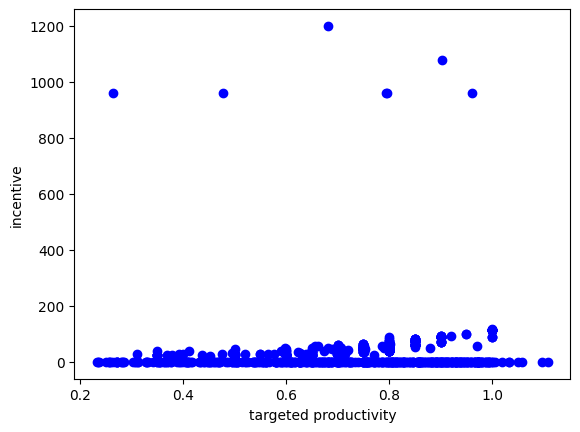

In [33]:
plt.scatter(train.actual_productivity, train.incentive,  color='blue')
plt.xlabel("targeted productivity")
plt.ylabel("incentive")
plt.show()

In [31]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['targeted_productivity','over_time','incentive']])
y = np.asanyarray(train[['actual_productivity']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 7.54725993e-01 -1.33952646e-06  8.61929895e-05]]


In [32]:
y_hat= regr.predict(test[['targeted_productivity','over_time','incentive']])
x = np.asanyarray(test[['targeted_productivity','over_time','incentive']])
y = np.asanyarray(test[['actual_productivity']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.03
Variance score: 0.14


C:\Users\91935\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [19]:
selected_features = [
    'quarter', 
    'department', 
    'team', 
    'targeted_productivity', 
    'smv', 
    'wip', 
    'over_time', 
    'incentive', 
    'actual_productivity'  # Target variable
]


In [20]:
# Drop rows with missing values
df_cleaned = df.dropna(subset=selected_features)

# Proceed with your regression model on df_cleaned


In [21]:
print(df[selected_features].isnull().sum())


quarter                    0
department                 0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
actual_productivity        0
dtype: int64
